## UTILITIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from collections import Counter

In [ ]:
df=pd.read_csv("ravdess_train.csv")


In [ ]:
df

Vocal_channel_  Emotion  Emotional_intensity  Statement  Repetition  \
0                  1        5                    0          1           0   
1                  1        5                    0          1           1   
2                  1        5                    0          0           0   
3                  1        5                    0          0           1   
4                  1        1                    0          1           0   
...              ...      ...                  ...        ...         ...   
1006               0        1                    1          0           0   
1007               0        1                    1          0           1   
1008               0        4                    0          1           0   
1009               0        4                    0          1           1   
1010               0        4                    0          0           0   

      Sex      mean       q50       q75       kur  ...  sc_q99_w4  sc_kur_w4  \
0       1  0.018034 -0.063106 -0.769300  0.553248  ...   1.332275  11.020083   
1       1  0.013950 -0.063106 -0.769300  0.770118  ...   1.315989  -0.107613   
2       1  0.018855 -0.063106 -0.769300  0.851346  ...   1.369021   7.023345   
3       1  0.018087 -0.063106 -0.769300  1.562804  ...   1.206493  -0.211628   
4       1  0.015921 -0.063106 -0.769300  0.286970  ...   1.361250  -0.040910   
...   ...       ...       ...       ...       ...  ...        ...        ...   
1006    0  0.068728 -0.063106  1.214054 -0.612055  ...   0.243648  -0.509491   
1007    0  0.039706 -0.063106  2.329691 -0.688885  ...  -0.468609  -0.308490   
1008    0  0.028109 -0.063106  3.651927 -0.833084  ...  -0.076986  -0.237810   
1009    0  0.039794 -0.063106  2.598270 -0.776028  ...   0.098552  -0.737388   
1010    0 -0.987526 -0.063106  4.189085 -0.694195  ...        NaN        NaN   

      sc_skew_w4  stft_sum_w4  stft_q05_w4  stft_q75_w4  stft_q95_w4  \
0      -4.354785     0.161158     2.167997     0.690192     0.036057   
1      -0.659640    -0.173413     1.610931     0.409754     0.036057   
2      -3.086640    -0.286208     1.285119     0.722854     0.036057   
3      -0.396009    -0.588962     1.176485     0.560400     0.036057   
4      -0.624456     0.170902     1.346235     0.452031     0.036057   
...          ...          ...          ...          ...          ...   
1006   -0.257807    -0.620419    -1.188902    -1.021949     0.036057   
1007    1.492308    -2.359453    -1.173806    -4.530167     0.036057   
1008    1.518442    -0.672890    -1.133879    -1.776255     0.036057   
1009    0.563803    -0.031655    -1.110743    -0.544252     0.036057   
1010         NaN          NaN          NaN          NaN          NaN   

      stft_kur_w4  stft_skew_w4  actor  
0        9.400360     -3.035005    1.0  
1       -0.186504      0.434538    1.0  
2        2.891302     -1.463754    1.0  
3       -0.049566     -0.052845    1.0  
4        0.878701     -0.532241    1.0  
...           ...           ...    ...  
1006    -0.988656      1.045351   10.0  
1007     0.416059      3.148102   10.0  
1008    -0.770428      1.406011   10.0  
1009    -1.019292      0.789346   10.0  
1010          NaN           NaN    NaN  

[1011 rows x 163 columns]

In [ ]:
attribute1=[col for col in df.columns if col != "Vocal_channel_"]
y=np.array(df["Vocal_channel_"])

np.unique(y, return_counts=True)


(array([0, 1]), array([411, 600]))

In [ ]:
40/1080


0.037037037037037035

In [ ]:
rows2remove = np.random.choice(df[y == 0].index, 748 - 40, replace=False)
df2 = df.drop(index=rows2remove, axis=0)
print(len(df2))
#rappresentazione del 3.57% nel dataset

In [ ]:
#definiamo il training set
df2.drop(['Vocal_channel_'],inplace=True, axis=1)
X_train=df2.values
y_train = np.array([y[i] for i in range(len(y)) if i not in rows2remove])


In [ ]:
df_test= pd.read_csv("Ravdess_test.csv", skipinitialspace=True)
df_test

Unnamed: 0  Vocal_channel_  Emotion  Emotional_intensity  Statement  \
0             0               1        5                    0          1   
1             1               1        5                    0          1   
2             2               1        5                    0          0   
3             3               1        5                    0          0   
4             4               1        1                    0          1   
..          ...             ...      ...                  ...        ...   
619         619               0        3                    0          0   
620         620               0        3                    1          1   
621         621               0        3                    1          1   
622         622               0        3                    1          0   
623         623               0        3                    1          0   

     Repetition  Sex      mean       q50       q75  ...  sc_q99_w4  sc_kur_w4  \
0             0    1  0.471300  0.040064 -0.739874  ...   0.713432  -0.190379   
1             1    1  0.126584  0.040064 -0.739874  ...   0.859202  -0.618751   
2             0    1 -0.591735  0.040064 -0.785476  ...   0.964382  -0.268520   
3             1    1 -0.077100  0.040064 -0.762675  ...   0.512538  -0.474050   
4             0    1  0.141006  0.040064 -0.762675  ...   0.783936   1.144458   
..          ...  ...       ...       ...       ...  ...        ...        ...   
619           1    0  0.310354  0.040064 -0.283859  ...  -0.782914  -0.112144   
620           0    0 -1.001327  0.040064 -0.101452  ...  -0.826903  -0.100709   
621           1    0  0.445345  0.040064 -0.078652  ...  -1.280200  -0.269630   
622           0    0  0.623436  0.040064 -0.124253  ...  -1.340317  -0.316858   
623           1    0  0.269074  0.040064  0.035352  ...  -0.604388  -0.355055   

     sc_skew_w4  stft_sum_w4  stft_q05_w4  stft_q75_w4  stft_q95_w4  \
0      0.251836    -0.162595     1.952153     1.254304     0.049581   
1      0.361906    -1.207090     0.699988     0.545470     0.049581   
2      0.616067    -0.799392     0.874587     0.940008     0.049581   
3      1.146812    -0.431005     1.740569     1.191764     0.049581   
4     -1.285417     0.456053     1.462546     1.232346     0.049581   
..          ...          ...          ...          ...          ...   
619   -0.762158     0.589910    -1.073992    -0.015243     0.049581   
620    1.306729    -0.616468    -1.103223    -1.388961     0.049581   
621    0.169706    -1.416799    -1.064193    -1.818966     0.049581   
622    0.328066    -0.312474    -0.724931    -0.636175     0.049581   
623   -0.361029     0.274598    -0.924025    -0.216222     0.049581   

     stft_kur_w4  stft_skew_w4  actor  
0       0.652919     -0.493238     19  
1       0.350178     -0.551086     19  
2       2.245793     -1.380431     19  
3      -0.361240      0.018907     19  
4       0.156689     -0.439458     19  
..           ...           ...    ...  
619     0.230264     -0.995984     24  
620    -0.455872      0.666612     24  
621    -0.671121      1.085149     24  
622    -0.083593      0.182546     24  
623     0.154279     -0.624532     24  

[624 rows x 164 columns]

In [ ]:
#df_test=df_test.drop(["Unnamed: 0"], axis=1)

In [ ]:
df_test=df_test.drop("Unnamed: 0", axis=1)

In [ ]:
df_test

Vocal_channel_  Emotion  Emotional_intensity  Statement  Repetition  Sex  \
0                 1        5                    0          1           0    1   
1                 1        5                    0          1           1    1   
2                 1        5                    0          0           0    1   
3                 1        5                    0          0           1    1   
4                 1        1                    0          1           0    1   
..              ...      ...                  ...        ...         ...  ...   
619               0        3                    0          0           1    0   
620               0        3                    1          1           0    0   
621               0        3                    1          1           1    0   
622               0        3                    1          0           0    0   
623               0        3                    1          0           1    0   

         mean       q50       q75       kur  ...  sc_q99_w4  sc_kur_w4  \
0    0.471300  0.040064 -0.739874  0.077772  ...   0.713432  -0.190379   
1    0.126584  0.040064 -0.739874  0.434766  ...   0.859202  -0.618751   
2   -0.591735  0.040064 -0.785476 -0.516932  ...   0.964382  -0.268520   
3   -0.077100  0.040064 -0.762675  0.577221  ...   0.512538  -0.474050   
4    0.141006  0.040064 -0.762675 -0.314121  ...   0.783936   1.144458   
..        ...       ...       ...       ...  ...        ...        ...   
619  0.310354  0.040064 -0.283859 -0.702275  ...  -0.782914  -0.112144   
620 -1.001327  0.040064 -0.101452  0.589876  ...  -0.826903  -0.100709   
621  0.445345  0.040064 -0.078652 -0.633855  ...  -1.280200  -0.269630   
622  0.623436  0.040064 -0.124253 -0.768437  ...  -1.340317  -0.316858   
623  0.269074  0.040064  0.035352 -0.596732  ...  -0.604388  -0.355055   

     sc_skew_w4  stft_sum_w4  stft_q05_w4  stft_q75_w4  stft_q95_w4  \
0      0.251836    -0.162595     1.952153     1.254304     0.049581   
1      0.361906    -1.207090     0.699988     0.545470     0.049581   
2      0.616067    -0.799392     0.874587     0.940008     0.049581   
3      1.146812    -0.431005     1.740569     1.191764     0.049581   
4     -1.285417     0.456053     1.462546     1.232346     0.049581   
..          ...          ...          ...          ...          ...   
619   -0.762158     0.589910    -1.073992    -0.015243     0.049581   
620    1.306729    -0.616468    -1.103223    -1.388961     0.049581   
621    0.169706    -1.416799    -1.064193    -1.818966     0.049581   
622    0.328066    -0.312474    -0.724931    -0.636175     0.049581   
623   -0.361029     0.274598    -0.924025    -0.216222     0.049581   

     stft_kur_w4  stft_skew_w4  actor  
0       0.652919     -0.493238     19  
1       0.350178     -0.551086     19  
2       2.245793     -1.380431     19  
3      -0.361240      0.018907     19  
4       0.156689     -0.439458     19  
..           ...           ...    ...  
619     0.230264     -0.995984     24  
620    -0.455872      0.666612     24  
621    -0.671121      1.085149     24  
622    -0.083593      0.182546     24  
623     0.154279     -0.624532     24  

[624 rows x 163 columns]

In [ ]:
y2=np.array(df_test["Vocal_channel_"])

In [ ]:
np.unique(y2, return_counts=True)
#speech = 1, song = 0

(array([0, 1]), array([264, 360]))

In [ ]:
rows2remove_ = np.random.choice(df_test[y2 == 0].index, 264 - 14, replace=False)#748:40=264:x  ----> 14
df3 = df_test.drop(index=rows2remove_, axis=0)
print(len(df3))
#rappresentazione del 3.74% nel dataset simile a 3.57 del training

374


In [ ]:
#definiamo il test set
df3.drop(['Vocal_channel_'],inplace=True, axis=1)
X_test=df3.values
y_test = np.array([y2[i] for i in range(len(y2)) if i not in rows2remove_])

Accuracy 0.9732620320855615
F1-score [0.66666667 0.98607242]
              precision    recall  f1-score   support

           0       0.62      0.71      0.67        14
           1       0.99      0.98      0.99       360

    accuracy                           0.97       374
   macro avg       0.81      0.85      0.83       374
weighted avg       0.98      0.97      0.97       374



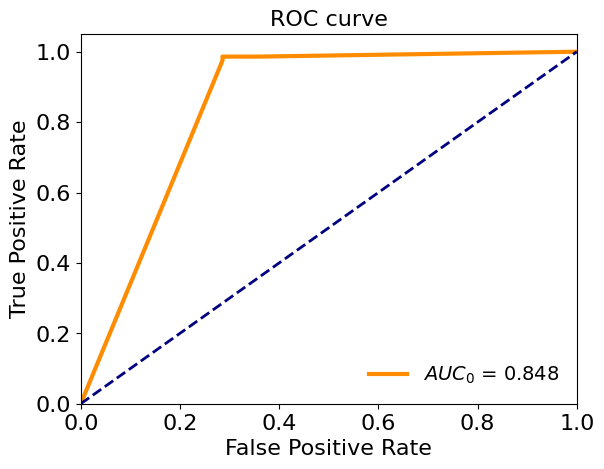

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train, y_train)

y_pred0= clf.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred0))
print('F1-score %s' % f1_score(y_test, y_pred0, average=None))
print(classification_report(y_test, y_pred0))

y_score = clf.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))


plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

## RECURSIVE FEATURE SELECTION

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

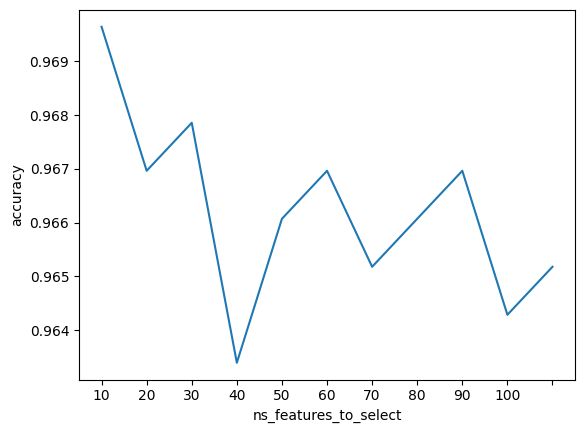

In [ ]:
ns_features_to_select = [10,20,30, 40, 50, 60, 70, 80, 90,100, None]
scores = list()
for n_features in ns_features_to_select:
    dt = RFE(DecisionTreeClassifier(),n_features_to_select=n_features)
    scores.append(cross_val_score(dt, X_train, y_train, cv=7).mean())
plt.plot(scores)
plt.xticks(range(len(ns_features_to_select)), ns_features_to_select)
plt.xlabel("ns_features_to_select")
plt.ylabel("accuracy")
plt.show()

In [ ]:
sel = RFE(DecisionTreeClassifier(), n_features_to_select=10)
X_train_sel= sel.fit_transform(X_train, y_train)
X_test_sel= sel.transform(X_test)

# CLASSIFICATION


UNDERSAMPLING

In [ ]:

#from sklearn.metrics import plot_roc
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import accuracy_score, f1_score,classification_report

Accuracy 0.9759358288770054
F1-score [0.68965517 0.98748261]
              precision    recall  f1-score   support

           0       0.67      0.71      0.69        14
           1       0.99      0.99      0.99       360

    accuracy                           0.98       374
   macro avg       0.83      0.85      0.84       374
weighted avg       0.98      0.98      0.98       374



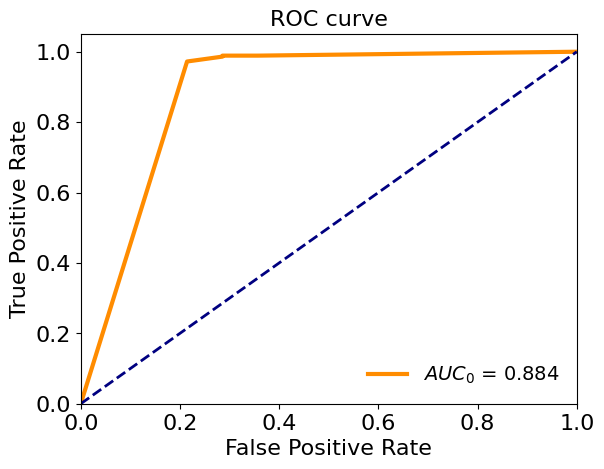

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_sel, y_train)

y_pred0= clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred0))
print('F1-score %s' % f1_score(y_test, y_pred0, average=None))
print(classification_report(y_test, y_pred0))

y_score = clf.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))


plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

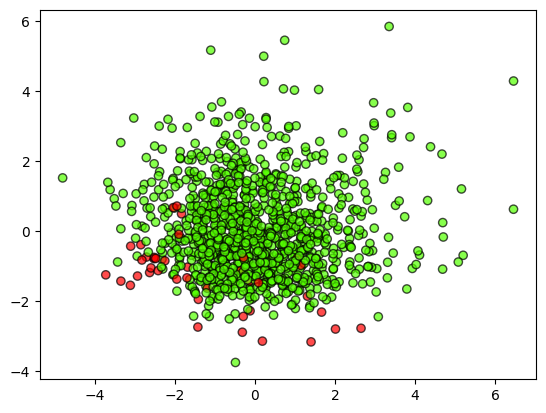

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train_sel)
X_pca = pca.transform(X_train_sel)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

#TOMEK LINKS

In [ ]:
!pip install imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.tree import DecisionTreeClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
tl = TomekLinks()
X_res, y_res = tl.fit_resample(X_train_sel, y_train)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='navy', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

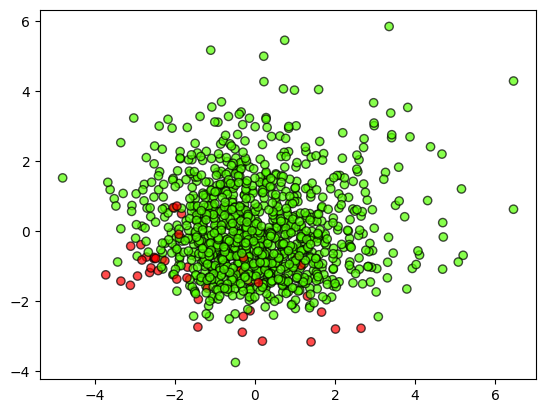

In [ ]:
pca = PCA(n_components=2)
pca.fit(X_train_sel)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

#RANDOM UNDER SAMPLER


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours

In [ ]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train_sel, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 40, 1: 40})


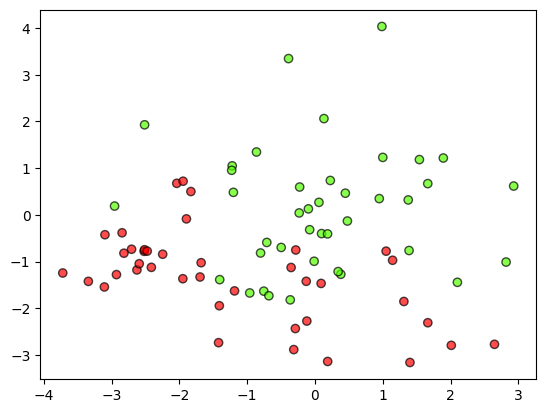

In [ ]:
pca = PCA(n_components=2)
pca.fit(X_train_sel)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

Accuracy 0.8796791443850267
F1-score [0.38356164 0.93333333]
              precision    recall  f1-score   support

           0       0.24      1.00      0.38        14
           1       1.00      0.88      0.93       360

    accuracy                           0.88       374
   macro avg       0.62      0.94      0.66       374
weighted avg       0.97      0.88      0.91       374



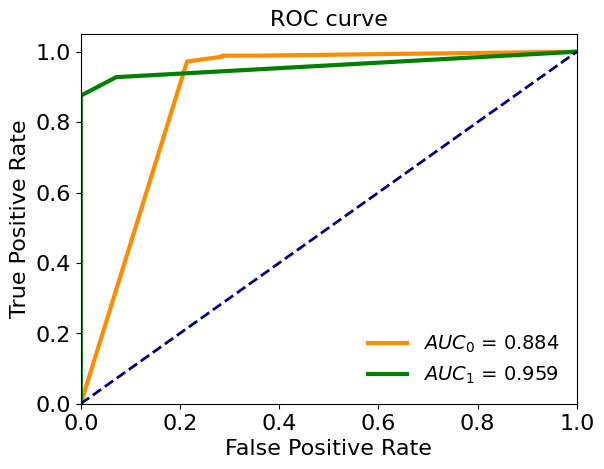

In [ ]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test_sel)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

#CONDENSED NEAREST NEIGHBOUR

In [ ]:
import warnings
warnings.simplefilter("ignore")

In [ ]:
cnn = CondensedNearestNeighbour(random_state=42, n_jobs=10)
X_res, y_res = cnn.fit_resample(X_train_sel, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 40, 1: 38})


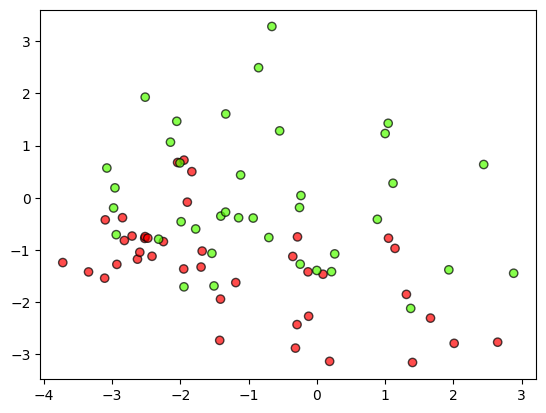

In [ ]:
pca = PCA(n_components=2)
pca.fit(X_train_sel)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

Accuracy 0.9411764705882353
F1-score [0.5     0.96875]
              precision    recall  f1-score   support

           0       0.37      0.79      0.50        14
           1       0.99      0.95      0.97       360

    accuracy                           0.94       374
   macro avg       0.68      0.87      0.73       374
weighted avg       0.97      0.94      0.95       374



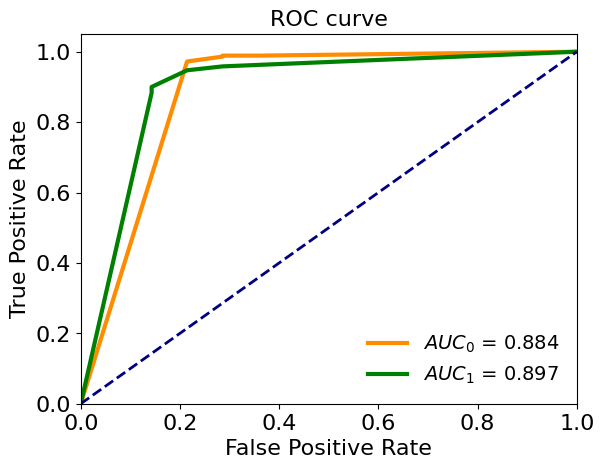

In [ ]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

#OVERSAMPLING

#ADASYN


In [ ]:

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

Accuracy 0.9893048128342246
F1-score [0.86666667 0.99442897]
              precision    recall  f1-score   support

           0       0.81      0.93      0.87        14
           1       1.00      0.99      0.99       360

    accuracy                           0.99       374
   macro avg       0.90      0.96      0.93       374
weighted avg       0.99      0.99      0.99       374



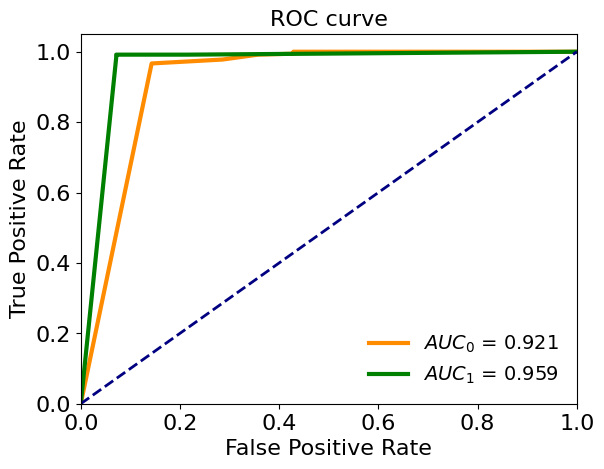

In [ ]:
ada = ADASYN(random_state=42)
X_res, y_res = ada.fit_resample(X_train, y_train)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

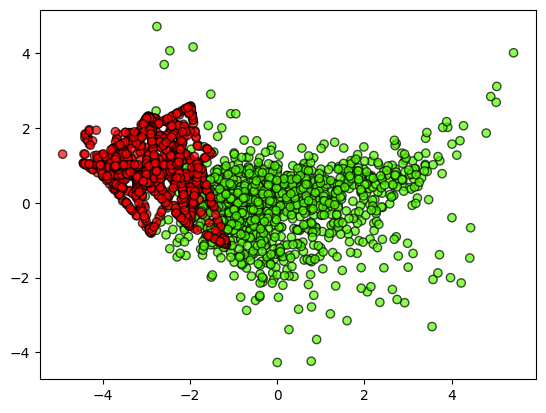

In [ ]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

#RANDOM OVER SAMPLER

In [ ]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train_sel, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 1080, 0: 1080})


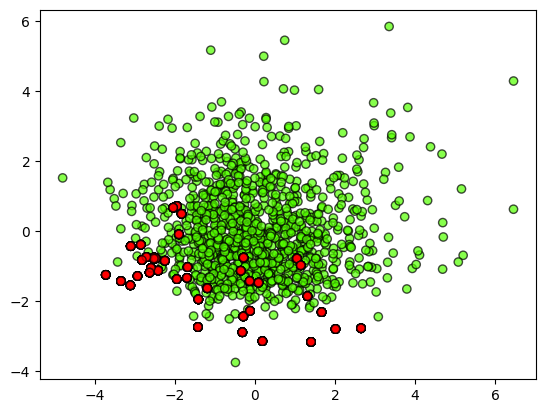

In [ ]:
pca = PCA(n_components=2)
pca.fit(X_train_sel)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

Accuracy 0.9759358288770054
F1-score [0.72727273 0.98741259]
              precision    recall  f1-score   support

           0       0.63      0.86      0.73        14
           1       0.99      0.98      0.99       360

    accuracy                           0.98       374
   macro avg       0.81      0.92      0.86       374
weighted avg       0.98      0.98      0.98       374



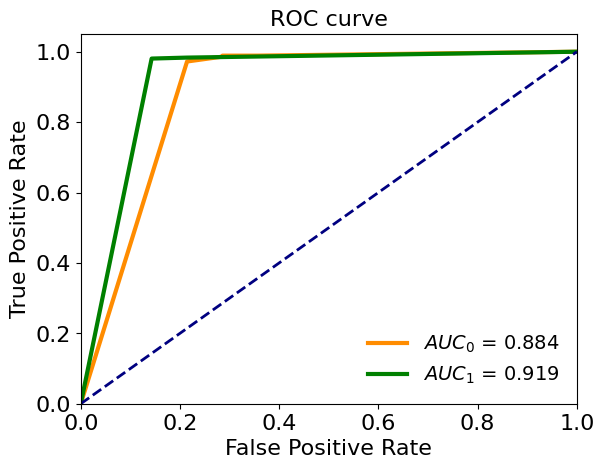

In [ ]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test_sel)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

#SMOTE

In [ ]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train_sel, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 1080, 0: 1080})


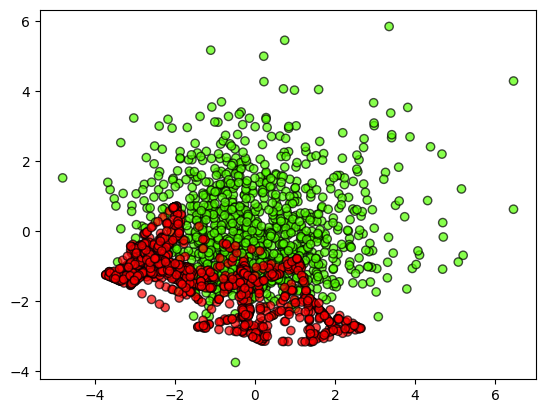

In [ ]:
pca = PCA(n_components=2)
pca.fit(X_train_sel)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

Accuracy 0.9705882352941176
F1-score [0.68571429 0.98457223]
              precision    recall  f1-score   support

           0       0.57      0.86      0.69        14
           1       0.99      0.97      0.98       360

    accuracy                           0.97       374
   macro avg       0.78      0.92      0.84       374
weighted avg       0.98      0.97      0.97       374



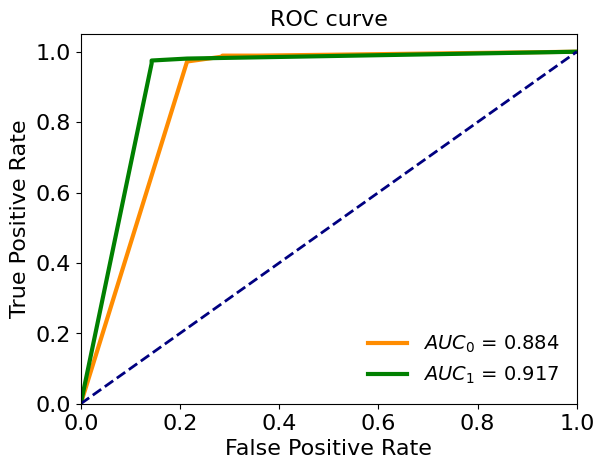

In [ ]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test_sel)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

# ADJUST THE WEIGHT CLASS

In [ ]:
import random
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform, randint, loguniform


#Creating a dictionary grid for grid search
weights = np.linspace(0.0,0.99,200)
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}
grid = RandomizedSearchCV(
    DecisionTreeClassifier(),
    param_distributions=param_grid,
    cv=RepeatedStratifiedKFold(n_splits=5,random_state=0),
    n_jobs=-1,
    n_iter=100,#this test only 100 combination of this hyperparameters
)
grid.fit(X_train, y_train)
clf = grid.best_estimator_

In [ ]:
print(grid.best_params_, grid.best_score_)

{'class_weight': {0: 0.855678391959799, 1: 0.144321608040201}} 0.98125


Accuracy 0.9812834224598931
F1-score [0.77419355 0.9902371 ]
              precision    recall  f1-score   support

           0       0.71      0.86      0.77        14
           1       0.99      0.99      0.99       360

    accuracy                           0.98       374
   macro avg       0.85      0.92      0.88       374
weighted avg       0.98      0.98      0.98       374



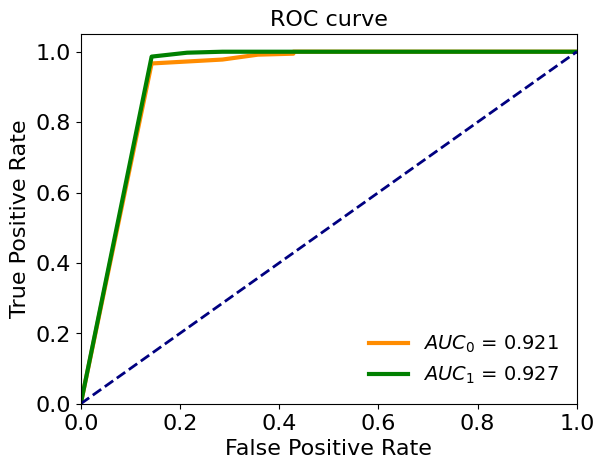

In [ ]:
clf = DecisionTreeClassifier(min_samples_leaf=3,
                             class_weight={0:0.97, 1: 0.03}, random_state=42)#we can make gridsearch for find the correct weights (we use different dictionaries)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()


#??????????????????????

#SMOTE + EDITED NEAREST NEIGHBORS
UNDERSAMPLING

Accuracy 0.983957219251337
F1-score [0.8        0.99164345]
              precision    recall  f1-score   support

           0       0.75      0.86      0.80        14
           1       0.99      0.99      0.99       360

    accuracy                           0.98       374
   macro avg       0.87      0.92      0.90       374
weighted avg       0.99      0.98      0.98       374



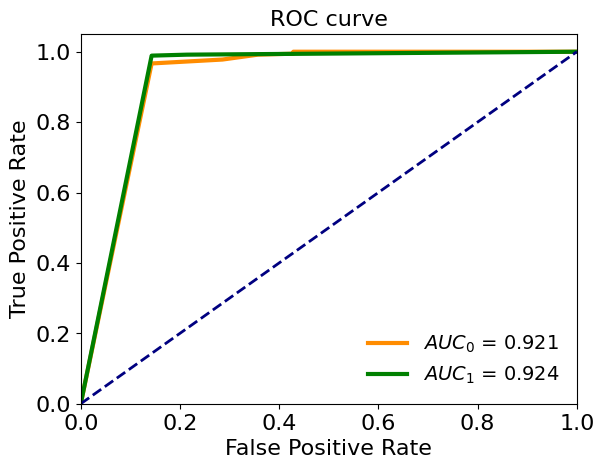

In [ ]:
from imblearn.combine import SMOTEENN


SMOTE_ENN = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'),random_state=42)
X_res, y_res = SMOTE_ENN.fit_resample(X_train, y_train)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

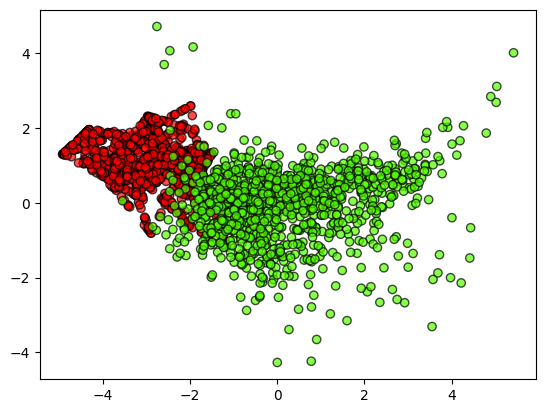

In [ ]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

#SMOTE + TOMEK LINKS

Accuracy 0.9812834224598931
F1-score [0.77419355 0.9902371 ]
              precision    recall  f1-score   support

           0       0.71      0.86      0.77        14
           1       0.99      0.99      0.99       360

    accuracy                           0.98       374
   macro avg       0.85      0.92      0.88       374
weighted avg       0.98      0.98      0.98       374



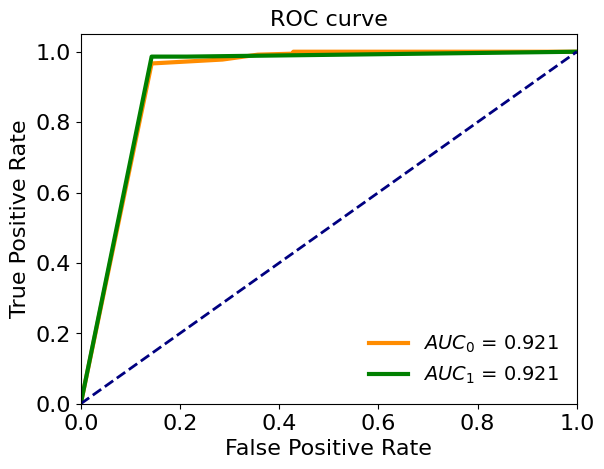

In [ ]:
from imblearn.combine import SMOTETomek
SMOTE_tomek = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'),random_state=42)
X_res, y_res = SMOTE_tomek.fit_resample(X_train, y_train)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

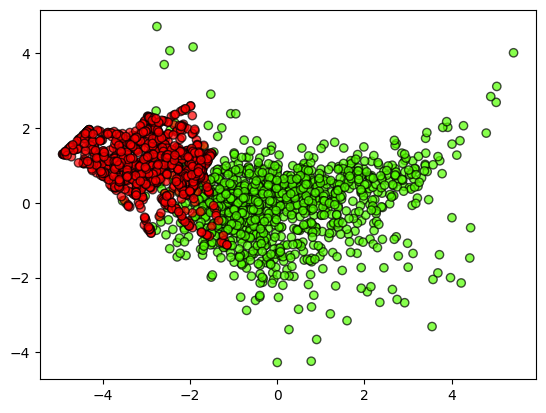

In [ ]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [ ]:
#plotting the tree of the best model (smote-ENN)
plt.figure(figsize=(30, 30), dpi=400)
plot_tree(clf, feature_names=df2.columns,class_names=['song','speech'], filled=True, rounded=True)
plt.show()#cerca prune unnecessary leaf scikit learn

In [ ]:
#import plotly.express as px

#fig = px.scatter_3d(df, x=df["kur"], y=df["q50"], z=df["q75"], color=df["mean"], symbol="Vocal_channel_")
#fig.show()